In [1]:
library(dplyr)
library(Quandl)
library(ggplot2)
library(zoo)
library(reshape2)
library(chron)
library(dualplot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last



In [2]:
Quandl.api_key(api_key = "8u9meDr5sQxGim8ATVt6")

In [3]:
tickers = list(c('WTI','CHRIS/CME_CL1.4'),
               c('Gold','CHRIS/CME_GC1.4'),
               c('Natural_Gas','CHRIS/CME_NG1.4'),
               c('Silver','CHRIS/CME_SI1.4'),
               c('Corn','CHRIS/CME_C1.4'),
               c('Wheat','CHRIS/CME_W1.4'),
               c('S&P_500','CHRIS/CME_ES1.6'),
               c('Dollar_TWI','FRED/DTWEXM'),
               c('US_Corps','ML/TRI'),
               c('US_AA','ML/AATRI'),
               c('US_BBB','ML/BBTRI'),
               c('EM_Corps','ML/EMCTRI'), 
               c('Fed_Funds_Rate','FRED/DFF'))

Real_GDP = 'FRED/GDPMC1'

### Asset Prices

In [4]:
get_data = function(product, start, end, collapse) {
    
    #List of Quandl codes
    q = list()  
    for(i in c(1:length(product))){q[i] = product[[i]][2]}
    
    #List of column names
    w = list()
    for(i in c(1:length(product))){w[i] = product[[i]][1]}
    
    #Generate code
    df = Quandl(code = q, 
                start_date = start, 
                end_date = end, 
                collapse = collapse)
    
    #Make the Date column as index
    rownames(df) = df$Date
    df$Date = NULL
    
    #Column Names are looped over the list of product names
    colnames(df) = w
    
    #Remove Weekends from Data
    df_final = df[which(weekdays(as.Date(rownames(df)))
          %in% c('Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday')), ]
    
    return(round(df_final, digits=1))
}

In [5]:
#Generate DF with all asset prices
portfolio = get_data(product=tickers, 
                     start='01-01-1940', 
                     end='01-01-2018', 
                     collapse='daily')
tail(portfolio, 14)

,WTI,Gold,Natural_Gas,Silver,Corn,Wheat,S&P_500,Dollar_TWI,US_Corps,US_AA,US_BBB,EM_Corps,Fed_Funds_Rate
2017-07-05,45.6,1226.5,2.9,16.0,382.0,540.5,2428.0,91.0,2836.9,642.7,432.5,385.0,1.2
2017-07-06,45.3,1224.7,2.9,16.0,380.5,520.5,2408.5,90.6,2831.5,641.4,431.8,384.5,1.2
2017-07-07,44.3,1211.9,2.9,15.5,381.8,517.2,2422.5,90.7,2828.3,640.6,431.0,384.3,1.2
2017-07-10,44.5,1213.7,2.9,15.6,392.0,531.0,2424.5,90.7,2833.2,641.6,431.3,384.8,1.2
2017-07-11,45.8,1217.0,3.0,15.8,392.0,533.2,2424.5,90.7,2835.2,642.1,431.4,384.9,1.2
2017-07-12,45.5,1219.7,3.0,15.9,376.2,521.5,2440.0,90.3,2842.7,643.8,432.4,385.8,1.2
2017-07-13,46.1,1216.7,3.0,15.6,360.0,496.0,2445.5,90.3,2839.8,643.0,432.6,386.0,1.2
2017-07-14,46.7,1228.0,3.0,15.9,369.0,NA,2456.0,89.7,2844.4,644.0,433.3,386.2,1.2
2017-07-17,46.0,1233.2,3.0,16.1,375.0,506.0,2458.5,NA,2848.7,644.9,434.1,386.6,1.2
2017-07-18,46.2,1241.9,3.1,16.2,377.0,504.5,2457.8,NA,2857.3,646.7,434.5,387.0,1.2


## Normalized Prices

In [65]:
normalize = function(df){
    
}

ERROR: Error in Ops.data.frame(df, df[1, ]): ‘/’ only defined for equally-sized data frames


### Log Returns

In [6]:
#Daily Log Returns
# The lag parameter in diff() function is 1 by default
log_returns = round(diff(as.matrix(log(portfolio))), 3)

# Fill NaN values forward
log_returns = na.locf(object = log_returns, na.rm = T)

#Matrix 
class(log_returns)

#Show Matrix
tail(log_returns,10)

[1] "matrix"

,WTI,Gold,Natural_Gas,Silver,Corn,Wheat,S&P_500,Dollar_TWI,US_Corps,US_AA,US_BBB,EM_Corps,Fed_Funds_Rate
2017-07-11,0.029,0.003,0.034,0.013,0.000,0.004,0.000,0.000,0.001,0.001,0.000,0.000,0
2017-07-12,-0.007,0.002,0.000,0.006,-0.041,-0.022,0.006,-0.004,0.003,0.003,0.002,0.002,0
2017-07-13,0.013,-0.002,0.000,-0.019,-0.044,-0.050,0.002,0.000,-0.001,-0.001,0.000,0.001,0
2017-07-14,0.013,0.009,0.000,0.019,0.025,-0.050,0.004,-0.007,0.002,0.002,0.002,0.001,0
2017-07-17,-0.015,0.004,0.000,0.013,0.016,-0.050,0.001,-0.007,0.002,0.001,0.002,0.001,0
2017-07-18,0.004,0.007,0.033,0.006,0.005,-0.003,0.000,-0.007,0.003,0.003,0.001,0.001,0
2017-07-19,0.019,-0.001,0.000,0.000,0.013,-0.001,0.006,-0.007,0.000,0.000,0.001,0.001,0
2017-07-20,-0.009,0.002,-0.033,0.000,0.022,0.005,0.000,-0.007,0.001,0.001,0.001,0.000,0
2017-07-21,-0.024,0.009,0.000,0.012,-0.028,-0.016,-0.001,-0.007,0.002,0.002,0.000,0.001,0
2017-07-24,0.020,0.000,-0.034,0.006,-0.009,-0.021,0.000,-0.007,0.002,0.002,0.000,0.001,0


# 1.) Recession - Performance of Asset Classes

#### I.) Fed Funds Rate vs. Assets

In [62]:
get_plot = function(asset1, asset2){
    df = portfolio[,c(asset1, asset2)]
    df = na.omit(df)
    graph = dualplot(x1 = as.Date(rownames(df)),
                     y1=df$Gold, 
                     y2=df$WTI, 
                     xlab='Date', 
                     ylab1=as.character(asset1),
                     ylab2=as.character(asset2))
}

The two series will be presented visually as though they had been converted to indexes.


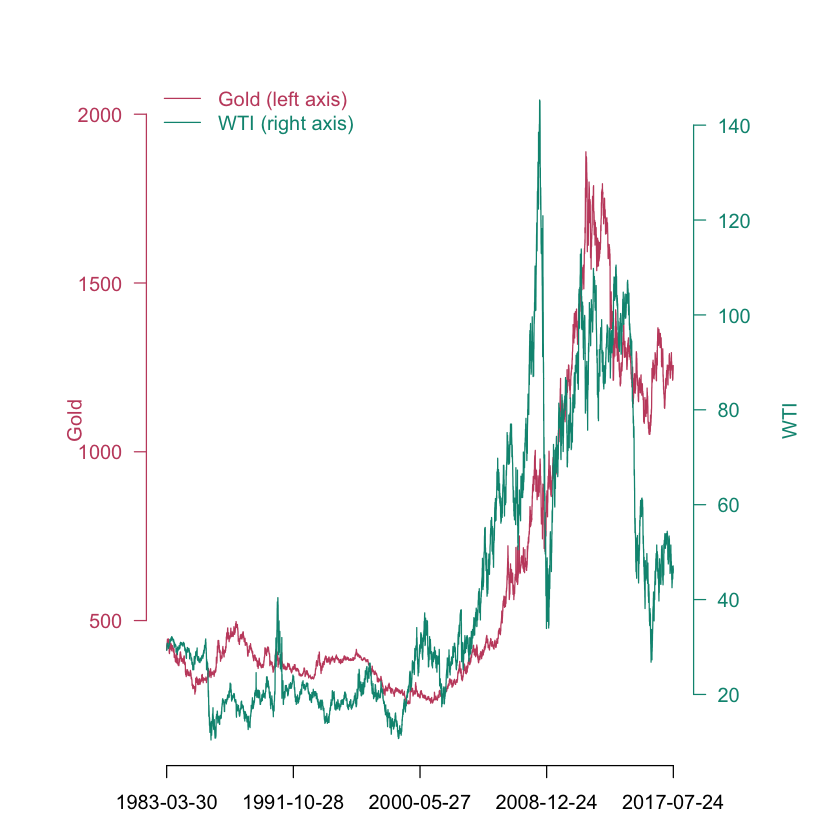

In [63]:
get_plot('Gold','WTI')